## Get data in and set up X_train, X_test, y_train objects

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 20.1 MB/s e

In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head(10)

Country or region  GDP per capita  Social support  \
0                     Peru           0.960           1.274   
1                Nicaragua           0.694           1.325   
2                   Greece           1.181           1.156   
3                    Qatar           1.684           1.313   
4               Uzbekistan           0.745           1.529   
5             South Africa           0.960           1.351   
6                    Chile           1.159           1.369   
7                   France           1.324           1.472   
8  Palestinian Territories           0.657           1.247   
9                   Poland           1.206           1.438   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.854                         0.455       0.083   
1                    0.835                         0.435       0.200   
2                    0.999                         0.067       0.000   
3                    0.871                         0.555       0.220   
4                    0.756                         0.631       0.322   
5                    0.469                         0.389       0.130   
6                    0.920                         0.357       0.187   
7                    1.045                         0.436       0.111   
8                    0.672                         0.225       0.103   
9                    0.884                         0.483       0.117   

   Perceptions of corruption                     name    region  \
0                      0.027                     Peru  Americas   
1                      0.127                Nicaragua  Americas   
2                      0.034                   Greece    Europe   
3                      0.167                    Qatar      Asia   
4                      0.240               Uzbekistan      Asia   
5                      0.055             South Africa    Africa   
6                      0.056                    Chile  Americas   
7                      0.183                   France    Europe   
8                      0.066  Palestinian Territories      Asia   
9                      0.050                   Poland    Europe   

                        sub-region  Terrorist_attacks  
0  Latin America and the Caribbean          18.000000  
1  Latin America and the Caribbean         125.611111  
2                  Southern Europe         112.000000  
3                     Western Asia          57.333333  
4                     Central Asia         125.611111  
5               Sub-Saharan Africa          41.000000  
6  Latin America and the Caribbean          25.000000  
7                   Western Europe          97.000000  
8                     Western Asia         122.000000  
9                   Eastern Europe           2.000000

In [4]:
y_train_labels.head()

0      Average
1         High
2      Average
3    Very High
4         High
dtype: object

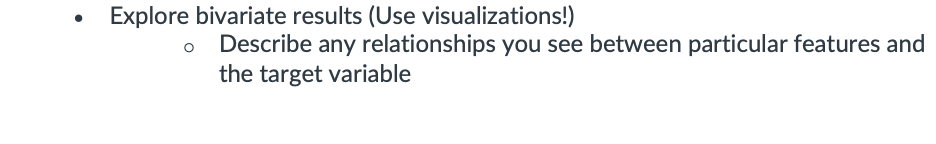

Text(0.5, 1.0, 'GDP VS Degree of Healthy life expectancy & Freedom to make life choices & Social support')

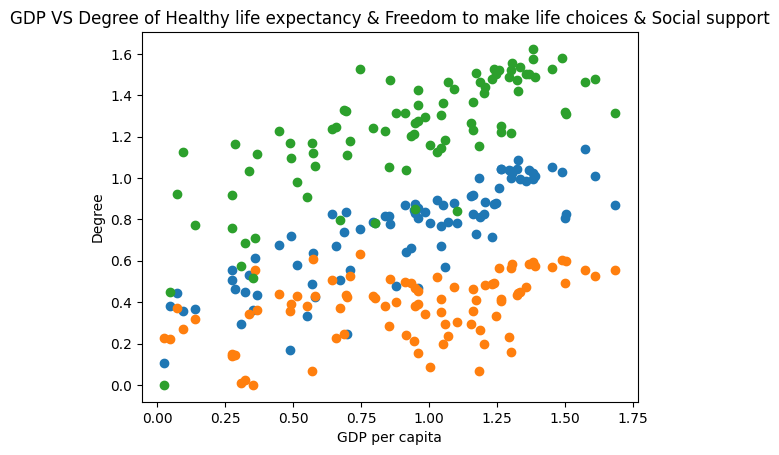

In [5]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.scatter(X_train['GDP per capita'], X_train['Healthy life expectancy'])
plt.xlabel('GDP per capita')

plt.scatter(X_train['GDP per capita'], X_train['Freedom to make life choices'])
plt.xlabel('GDP per capita')

plt.scatter(X_train['GDP per capita'], X_train['Social support'])
plt.xlabel('GDP per capita')
plt.ylabel('Degree')
plt.title("GDP VS Degree of Healthy life expectancy & Freedom to make life choices & Social support")

With the increasing of GDP per capita, Healthy life expectancy, Freedom to make life choices and Social support rise to varying degrees. They are positive correlated.

## Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [7]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [8]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

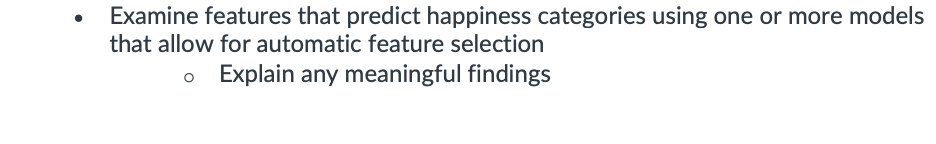

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}

gridmodel = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=5)

gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.660
best parameters: {'C': 1.0, 'penalty': 'l1'}


The best parameters for logistic regression are 'C': 1.0 and 'penalty': 'l1'.

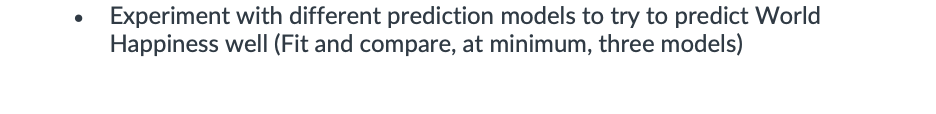

##Fit model on preprocessed data and save preprocessor function and model


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8409090909090909

#### Save preprocessor function to local "preprocessor.zip" file

In [11]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [12]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)


## Generate predictions from X_test data and submit model to competition


In [13]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [14]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [16]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 952

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [17]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## Repeat submission process to improve place on leaderboard


In [18]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, max_depth=5)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_2.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9545454545454546

In [19]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)


In [20]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_2,
                                 prediction_submission=prediction_labels,
                                 preprocessor="preprocessor.zip")

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 953

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [21]:
# Compare two or more models
data=mycompetition.compare_models([2,3], verbose=1)
mycompetition.stylize_compare(data)

In [22]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.669
best parameters: {'max_depth': 5, 'n_estimators': 100}


In [23]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)


In [24]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model = gridmodel,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 954

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [25]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [26]:
# Compare two or more models
data=mycompetition.compare_models([3,4], verbose=1)
mycompetition.stylize_compare(data)

In [28]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model= model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)



This ORT build has ['AzureExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['AzureExecutionProvider', 'CPUExecutionProvider'], ...)
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 955

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [29]:
# Or you can experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax'))

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Epoch 1/300
4/4 [==============================] - 2s 210ms/step - loss: 1.5752 - accuracy: 0.4091 - val_loss: 1.5929 - val_accuracy: 0.3636
Epoch 2/300
4/4 [==============================] - 0s 32ms/step - loss: 1.5648 - accuracy: 0.4242 - val_loss: 1.5863 - val_accuracy: 0.3182
Epoch 3/300
4/4 [==============================] - 0s 55ms/step - loss: 1.5534 - accuracy: 0.4242 - val_loss: 1.5827 - val_accuracy: 0.2727
Epoch 4/300
4/4 [==============================] - 0s 29ms/step - loss: 1.5443 - accuracy: 0.4394 - val_loss: 1.5801 - val_accuracy: 0.2727
Epoch 5/300
4/4 [==============================] - 0s 34ms/step - loss: 1.5347 - accuracy: 0.4242 - val_loss: 1.5761 - val_accuracy: 0.2727
Epoch 6/300
4/4 [==============================] - 0s 26ms/step - loss: 1.5246 - accuracy: 0.4394 - val_loss: 1.5711 - val_accuracy: 0.3182
Epoch 7/300
4/4 [==============================] - 0s 27ms/step - loss: 1.5126 - accuracy: 0.4545 - val_loss: 1.5687 - val_accuracy: 0.2727
Epoch 8/300
4/4 [==

In [34]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(n_estimators=100, max_depth=5)
best_model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
best_model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9545454545454546

my best model is RandomForestClassifier with parameters that n_estimator=100 and max_depth=5.

In [35]:
# Submit keras model:

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = keras_model,
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

3/3 [==============================] - 0s 3ms/step
Do you want to keep trying (1) or submit predictions only (2)? 2
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 957

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [32]:
# Check leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)